In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
training_generator  = ImageDataGenerator(
    rescale =1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 
) 

In [11]:
train_dir  = r'F:\Image_dataset\Dataset1\Train'

In [14]:
# Loading the data
train_generator = training_generator.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
     subset='training',  
    shuffle=True
)

Found 284 images belonging to 2 classes.


In [17]:
validation_generator = training_generator.flow_from_directory(
    train_dir,  # Same directory as training data
    target_size=(100, 100),
    batch_size=16,
    class_mode='binary',
    subset='validation',  # Use 20% of data for validation
    shuffle=True
)

Found 69 images belonging to 2 classes.


In [21]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  
])

In [22]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])
  

In [23]:
# Training the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.4864 - loss: 0.6965 - val_accuracy: 0.4783 - val_loss: 0.6942
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 565ms/step - accuracy: 0.5951 - loss: 0.6899 - val_accuracy: 0.5362 - val_loss: 0.6981
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 582ms/step - accuracy: 0.5626 - loss: 0.6846 - val_accuracy: 0.4493 - val_loss: 0.6945
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 584ms/step - accuracy: 0.6031 - loss: 0.6844 - val_accuracy: 0.5942 - val_loss: 0.6863
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 540ms/step - accuracy: 0.5985 - loss: 0.6899 - val_accuracy: 0.5217 - val_loss: 0.6911
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 582ms/step - accuracy: 0.4895 - loss: 0.6892 - val_accuracy: 0.5362 - val_loss: 0.6882
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 565ms/step - accuracy: 0.5501 - loss: 0.6872 - val_accuracy: 0.6377 - val_loss: 0.6803
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 556ms/step - accuracy: 0.6320 - loss: 0.6744 - val_accuracy: 0.5942 - val_loss: 0.675

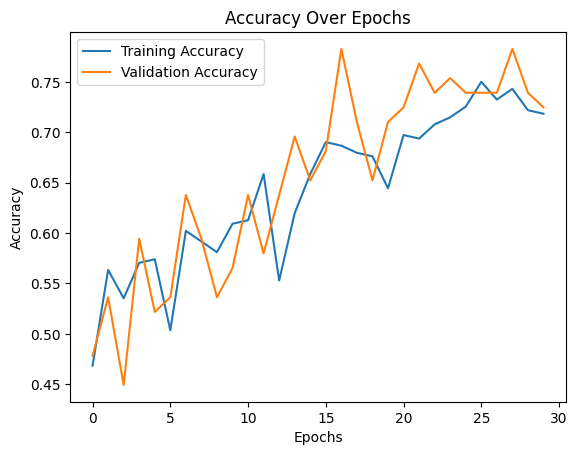

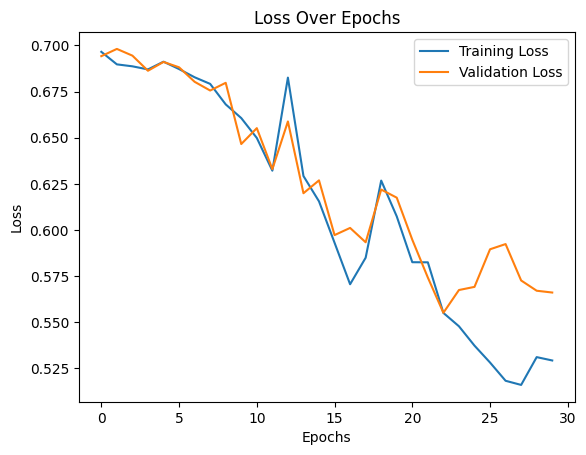

In [28]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Save the accuracy plot
plt.savefig(r"F:\Image_dataset\Dataset1\Accuracy.pdf")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Save the loss plot
plt.savefig(r"F:\Image_dataset\Dataset1\Loss.pdf")
plt.show()


In [30]:
# Save the trained model
model.save('F:\Image_dataset\Dataset1\cat_dog_classifier.h5')

In [31]:
from tensorflow.keras.models import load_model

In [32]:

# Load the trained model
model = load_model(r'F:\Image_dataset\Dataset1\cat_dog_classifier.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


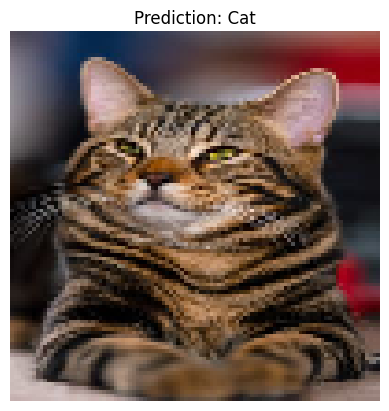

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


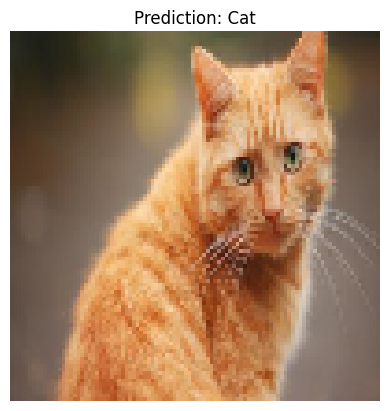

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


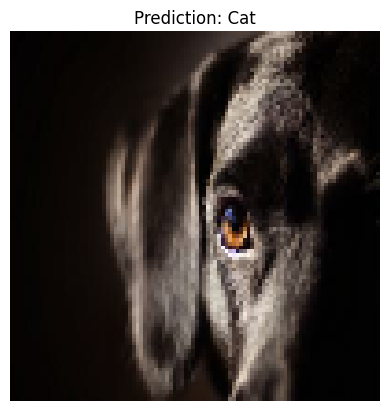

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


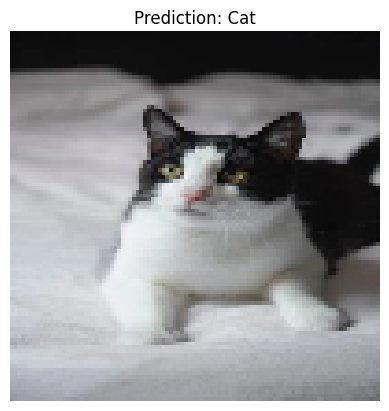

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


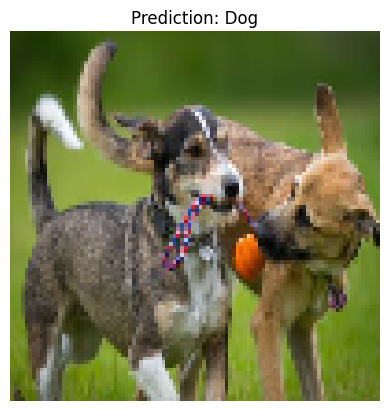

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


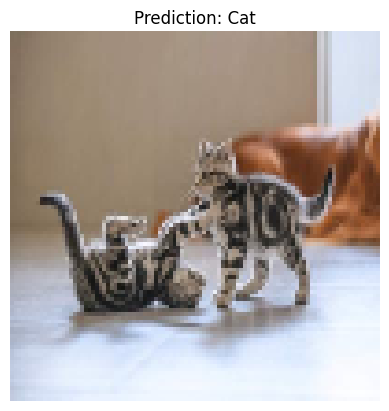

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


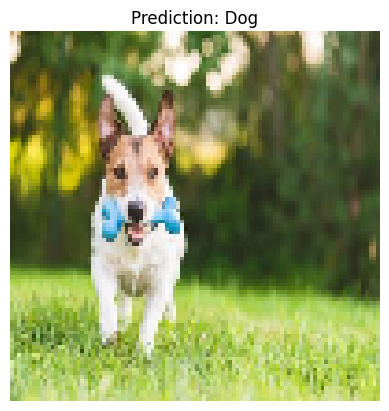

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


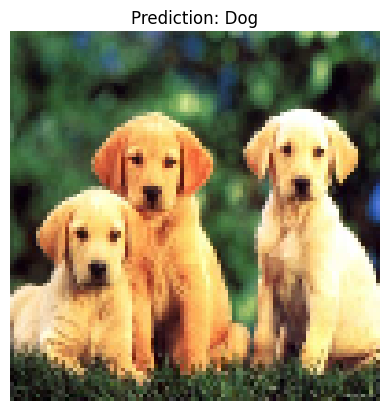

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


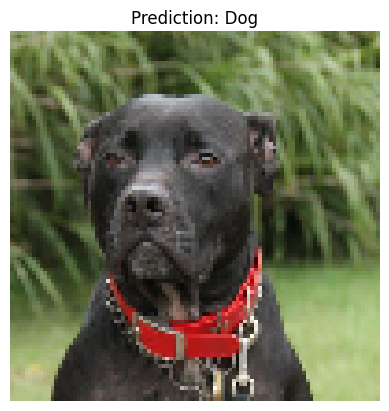

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


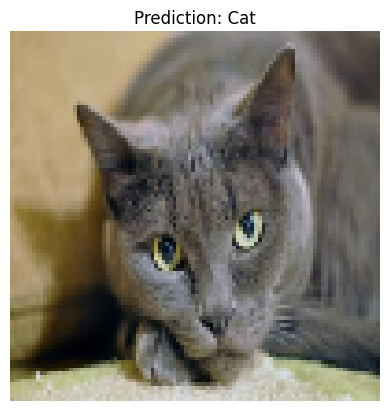

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


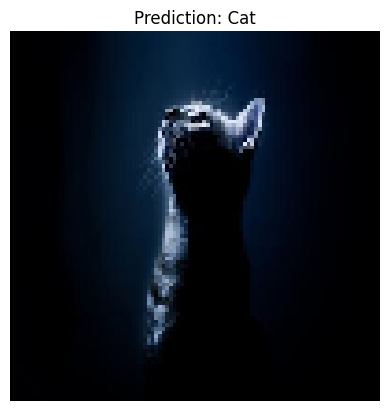

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


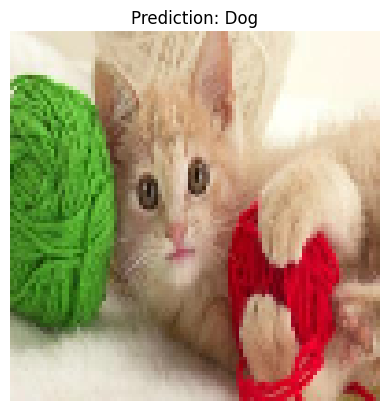

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


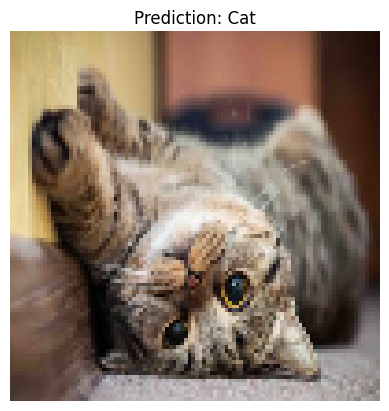

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


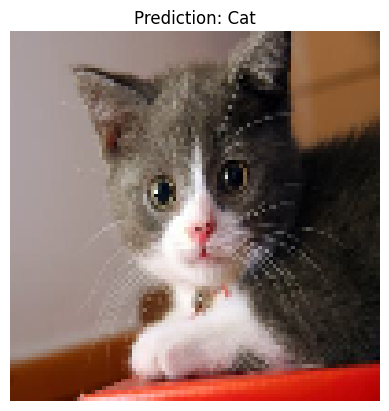

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


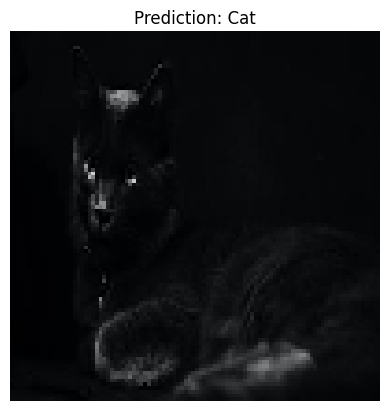

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


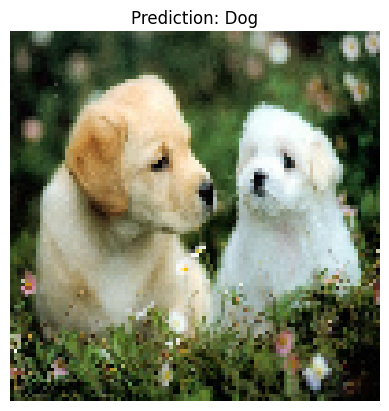

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


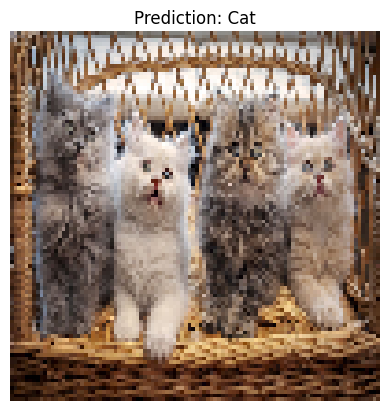

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


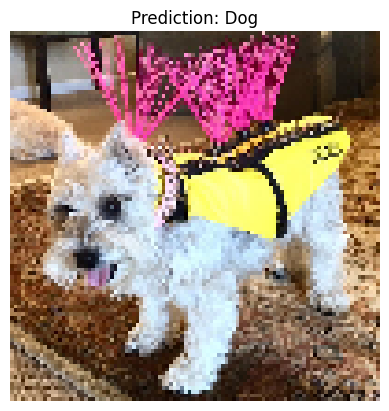

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


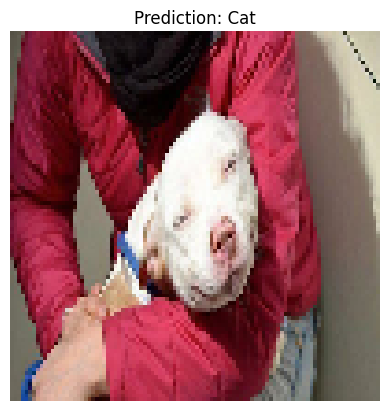

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


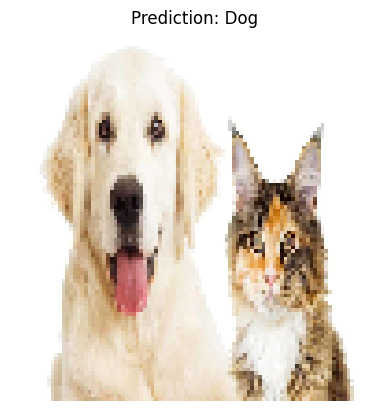

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


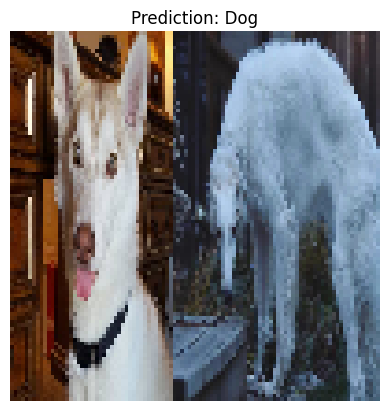

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


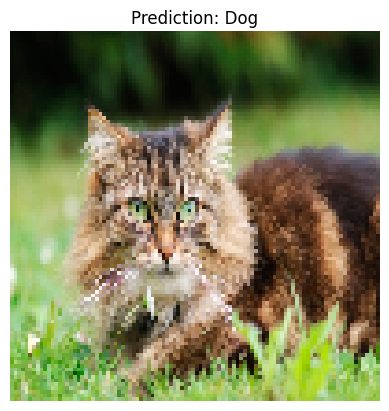

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


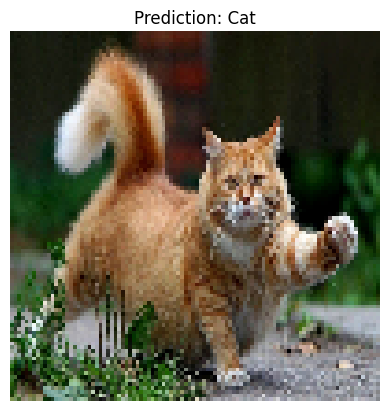

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


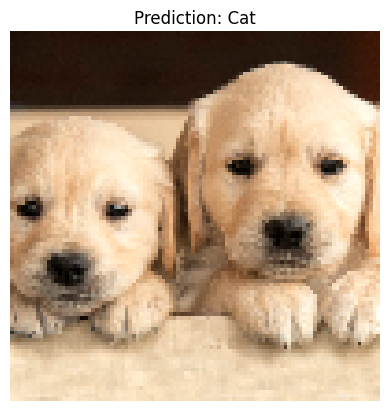

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


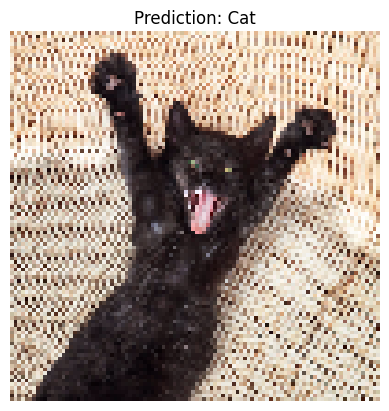

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


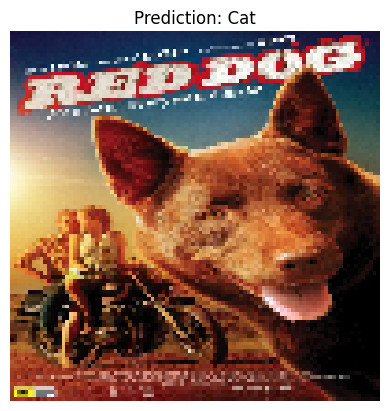

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


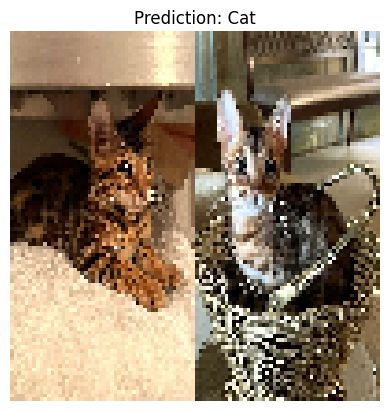

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


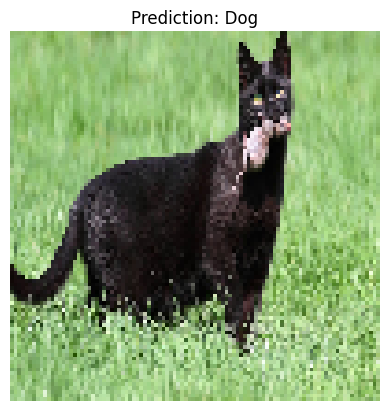

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


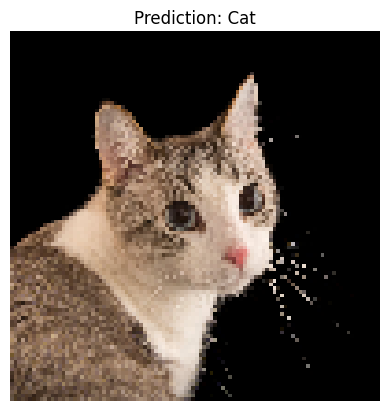

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


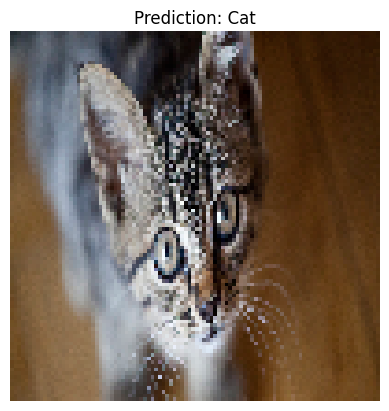

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


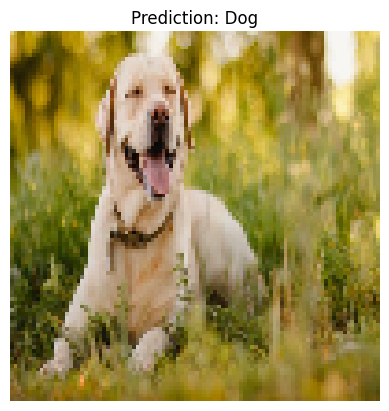

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


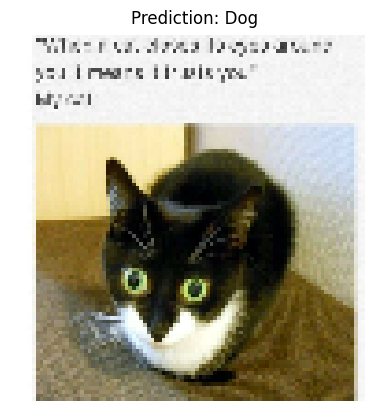

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


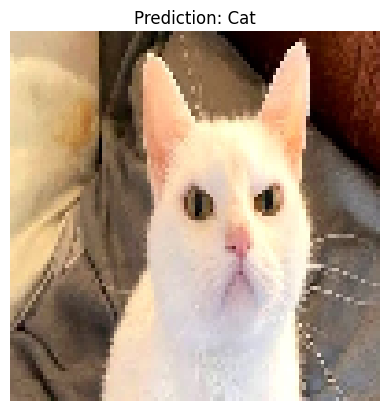

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


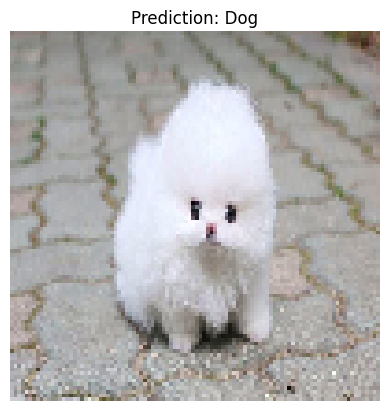

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


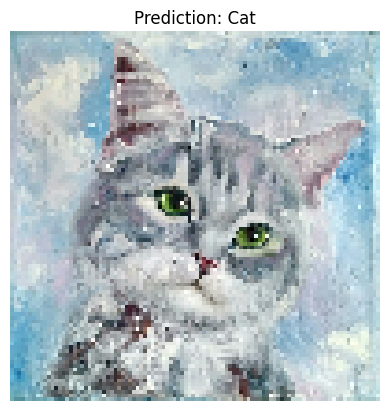

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


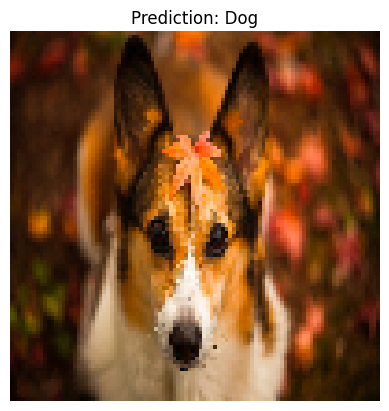

In [36]:
import os
from tensorflow.keras.preprocessing import image
# Function to classify and display image
def classify_and_display_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(100, 100))  # Resize to the input size of the model
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Normalize the image (if the model was trained with normalization)
    img_array = img_array / 255.0

    # Predict the class (cat or dog)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)  # Get the index of the max value
    class_label = 'Dog' if prediction >= 0.5 else 'Cat'  # Assuming 1 is dog and 0 is cat

    # Display the image and prediction result
    plt.imshow(img)
    plt.title(f'Prediction: {class_label}')
    plt.axis('off')  # Turn off axes for better presentation
    plt.show()

# Path to the folder containing images
image_folder = r'F:\Image_dataset\Dataset1\Test'

# Loop through all images in the folder and classify them
for filename in os.listdir(image_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(image_folder, filename)
        classify_and_display_image(img_path)
